In [1]:
!pip install spacy textblob nltk gensim
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
  Atte

In [3]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system ==

In [1]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:

from datasets import load_dataset


dataset = load_dataset("amazon_polarity", split='train[:10000]')
texts = dataset["content"]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/260M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/254M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/117M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400000 [00:00<?, ? examples/s]

In [3]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

# Text Preprocessing

In [4]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [9]:
cleaned_texts = [preprocess(t) for t in texts]
for i in range(5):
    print(f"\nCleaned Data {i+1}: {cleaned_texts[i]}")


Cleaned Data 1: sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen

Cleaned Data 2: im reading lot reviews saying best game soundtrack figured id write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless im listening years beauty simply refuses fadethe price tag pretty staggering must say going buy cd much money one feel would worth every penny

Cleaned Data 3: soundtrack favorite music time hands intense sadness prisoners fate means youve played game hope distant promise girl stole star important inspiration personally throughout teen years higher energy tracks like chrono cross times scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb wellthis soundtrack amazing music probably best composers work havent he

#  Sentiment Analysis

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return sid.polarity_scores(text)["compound"]

sentiments = [get_sentiment(t) for t in cleaned_texts]


for i in range(5):
    print(f"\nReview {i+1} Sentiment Score: {sentiments[i]}")



Review 1 Sentiment Score: 0.9062

Review 2 Sentiment Score: 0.9393

Review 3 Sentiment Score: 0.9833

Review 4 Sentiment Score: 0.9753

Review 5 Sentiment Score: 0.9767


# Named Entity Recognition

In [10]:
import spacy
nlp = spacy.load("en_core_web_sm")


ner_sample = cleaned_texts[:5]
entities = []

for doc in nlp.pipe(ner_sample, batch_size=10):
    ents = [(ent.text, ent.label_) for ent in doc.ents]
    entities.append(ents)

for i, ents in enumerate(entities):
    print(f"\n--- Named Entities in Review {i+1} ---\n{ents}")



--- Named Entities in Review 1 ---
[]

--- Named Entities in Review 2 ---
[('yasunori mitsudas', 'PERSON'), ('years', 'DATE'), ('every penny', 'MONEY')]

--- Named Entities in Review 3 ---
[('teen years', 'DATE')]

--- Named Entities in Review 4 ---
[('two', 'CARDINAL'), ('three', 'CARDINAL'), ('three', 'CARDINAL'), ('jellyfish sea', 'LOC')]

--- Named Entities in Review 5 ---
[('yasunori mitsuda', 'PERSON')]


# TOPIC MODELING

In [11]:
from gensim import corpora, models

tokenized = [text.split() for text in cleaned_texts]
dictionary = corpora.Dictionary(tokenized)
corpus = [dictionary.doc2bow(t) for t in tokenized]

lda = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

print("\n📈 LDA Topics:")
for idx, topic in lda.print_topics(-1):
    print(f"Topic {idx}: {topic}")



📈 LDA Topics:
Topic 0: 0.010*"one" + 0.008*"would" + 0.007*"get" + 0.007*"product" + 0.006*"bought" + 0.006*"use" + 0.006*"great" + 0.005*"buy" + 0.005*"like" + 0.005*"good"
Topic 1: 0.029*"game" + 0.006*"games" + 0.005*"play" + 0.005*"fun" + 0.004*"get" + 0.004*"graphics" + 0.003*"like" + 0.002*"playing" + 0.002*"played" + 0.002*"hair"
Topic 2: 0.005*"information" + 0.004*"book" + 0.003*"java" + 0.003*"edition" + 0.003*"text" + 0.002*"useful" + 0.002*"find" + 0.002*"guide" + 0.002*"recipes" + 0.002*"errors"
Topic 3: 0.023*"movie" + 0.011*"one" + 0.010*"like" + 0.009*"film" + 0.008*"good" + 0.008*"great" + 0.008*"cd" + 0.007*"music" + 0.006*"album" + 0.006*"dvd"
Topic 4: 0.041*"book" + 0.018*"read" + 0.009*"one" + 0.007*"story" + 0.007*"like" + 0.007*"would" + 0.007*"books" + 0.006*"reading" + 0.005*"good" + 0.005*"time"



📊 Sample Results:
                                                text  sentiment_score  \
0  sound track beautiful paints senery mind well ...           0.9062   
1  im reading lot reviews saying best game soundt...           0.9393   
2  soundtrack favorite music time hands intense s...           0.9833   
3  truly like soundtrack enjoy video game music p...           0.9753   
4  youve played game know divine music every sing...           0.9767   

  sentiment_label  
0        positive  
1        positive  
2        positive  
3        positive  
4        positive  


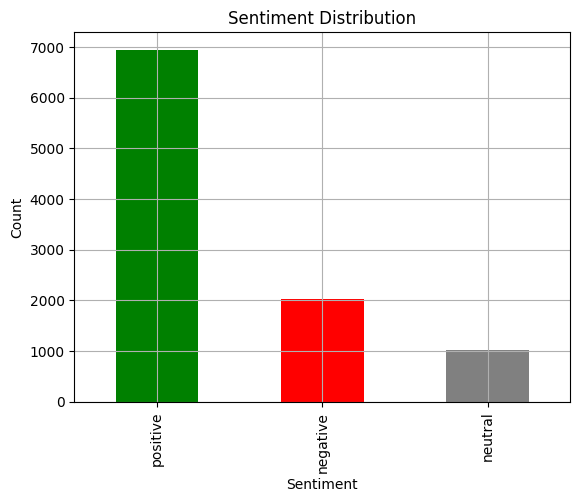

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "text": cleaned_texts,
    "sentiment_score": sentiments
})

df["sentiment_label"] = df["sentiment_score"].apply(
    lambda x: "positive" if x > 0.2 else "negative" if x < -0.2 else "neutral"
)

print("\n📊 Sample Results:")
print(df[["text", "sentiment_score", "sentiment_label"]].head())


df["sentiment_label"].value_counts().plot(kind="bar", title="Sentiment Distribution", color=["green", "red", "gray"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.grid(True)
plt.show()
